<a href="https://colab.research.google.com/github/hyodolee/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기
df = pd.read_csv('data.csv', encoding = 'utf-8', sep=',', header = 0, index_col = None, skiprows=None, nrows=None)
print(df)

           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6


## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력
with open('data.json', mode='r', encoding='utf-8') as f:
    data = json.load(f)
print(data)
## data.json 파일 DataFrame 읽기
df = pd.read_json('data.json', orient = 'records', encoding='utf-8')
print(df)

{'매출데이터': [{'월': '2025-01', '매출액': 1000000, '비용': 700000, '이익': 300000}, {'월': '2025-02', '매출액': 1200000, '비용': 800000, '이익': 400000}, {'월': '2025-03', '매출액': 1500000, '비용': 900000, '이익': 600000}]}
                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,...


## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성
pattern = re.compile(r'(\d{6})-(\d{7})')
## 주민등록번호 마스킹
masked_content = pattern.sub(r'\1-*******',content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('callcenter20250301_masked.log', mode='w') as f:
    f.write(masked_content)
print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import pandas as pd
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get(url, params=params)
    response.raise_for_status()

    ## JSON 데이터 읽기
    data = response.json()

    print("API 응답:", data)

    df1 = pd.DataFrame.from_dict(data)
    with open('output.json', mode='w',encoding='utf-8')as f:
     json.dump(data, f, indent=4, ensure_ascii=False)

    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.6, 'longitude': 127.0, 'generationtime_ms': 0.030040740966796875, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 29.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-09-15T10:45', 'interval': 900, 'temperature_2m': 24.8}}
서울시 종로구의 현재 온도는 : 24.8°C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115M  100  115M    0     0   191M      0 --:--:-- --:--:-- --:--:--  192M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.9 MB/131 MB of archives.
After this operation, 447 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 mesa-vulkan-drivers amd64 23.2.1-1ubuntu3.1~22.04.3 [10.7

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://professor.knou.ac.kr/jaehwachung/index.do'
driver.get(url)
## 사이트 접속 대기
time.sleep(2)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)

title_text = tree.xpath('//title/text()')
print(title_text)

## 드라이버 종료
driver.quit()

['\n\t\tAlert \n\t\t\n\t']



# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정
url = 'http://openapi.seoul.go.kr:8088/56536d4f5568353536375658507478/json/energyUseDataSummaryInfo/1/5/2015/01'
##api_key = '56536d4f5568353536375658507478'
params = {
    'KEY': api_key,
    'TYPE': 'json',
    'SERVICE': 'energyUseDataSummaryInfo',
    'START_INDEX': '1',
    'END_INDEX': '100',
    'YEAR': '2020',
    'MON': '01'
}

# responses = {
#     'year': [],
#     'mon': [],
#     'eus': [],
#     'gus': [],
#     'wus': [],
#     'hus': []
# }

    # if not personEnergy:
    #     responses['year'].append(year_month[0:4])
    #     responses['mon'].append(year_month[-2:])
    #     responses['eus'].append(None)
    #     responses['gus'].append(None)
    #     responses['wus'].append(None)
    #     responses['hus'].append(None)
    # else :
    #     responses['year'].append(personEnergy[0]['YEAR'])
    #     responses['mon'].append(personEnergy[0]['MON'])
    #     responses['eus'].append(personEnergy[0]['EUS'])
    #     responses['gus'].append(personEnergy[0]['GUS'])
    #     responses['wus'].append(personEnergy[0]['WUS'])
    #     responses['hus'].append(personEnergy[0]['HUS'])


    #print(year_month)

## 데이터 수집
response = requests.get(url,params = params)
## 호출 성공/실패 출력

print(response.json())

{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.8', 'WUS2'

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,894 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126675 files and dire

   계절          현년가스
0   봄  4.435986e+07
1  여름  1.273423e+07
2  가을  1.688820e+07
3  겨울  6.151109e+07


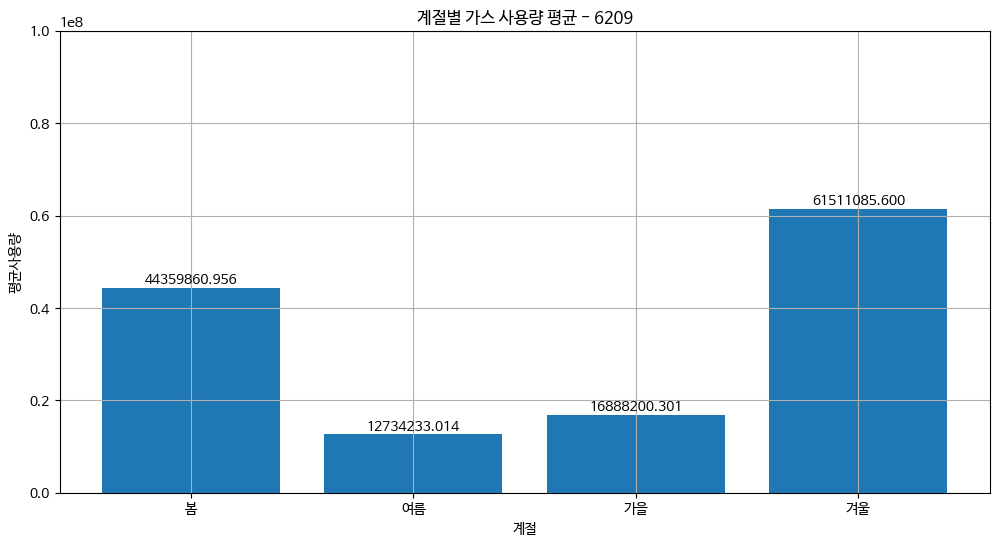

In [65]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

api = '56536d4f5568353536375658507478'

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months


responses = []
selectKeys = ['YEAR', 'MON', 'EUS', 'GUS', 'WUS', 'HUS']

for year_month in get_year_months():
    url = f'http://openapi.seoul.go.kr:8088/{api}/json/energyUseDataSummaryInfo/1/5/{year_month[0:4]}/{year_month[-2:]}'

    ## 데이터 수집
    response = requests.get(url)
    data = response.json()

    ## 개인 유형의 에너지 사용량 데이터 추출
    personEnergy = [energyType for energyType in data['energyUseDataSummaryInfo']['row'] if energyType['MM_TYPE'] == '개인']

    filteredPe = {}

    ## personEnergy 리스트가 비어있다면
    if not personEnergy:
        filteredPe = {'YEAR': year_month[0:4], 'MON': year_month[-2:], 'EUS': np.nan, 'GUS': np.nan, 'WUS': np.nan, 'HUS': np.nan}
    else :
        for key in selectKeys:
            if key in personEnergy[0]:
                filteredPe[key] = personEnergy[0][key]

    responses.append(filteredPe)

df = pd.DataFrame(responses)

## 현년 에너지 열의 값을 숫자형으로 변환
df['MON'] = df['MON'].astype(int)
df['EUS'] = df['EUS'].astype(float)
df['GUS'] = df['GUS'].astype(float)
df['WUS'] = df['WUS'].astype(float)
df['HUS'] = df['HUS'].astype(float)

### 현년전기,가스,수도,지역난방 선형보간법 적용
df.loc[:, ['EUS','GUS','WUS','HUS']] = df[['EUS','GUS','WUS','HUS']].interpolate(method='linear')

## 계절 컬럼 추가
df['SEASON'] = '겨울'
df.loc[(df['MON'] >= 3) & (df['MON'] <= 5), 'SEASON'] = '봄'
df.loc[(df['MON'] >= 6) & (df['MON'] <= 8), 'SEASON'] = '여름'
df.loc[(df['MON'] >= 9) & (df['MON'] <= 11), 'SEASON'] = '가을'

df_renamed = df.rename(columns={'YEAR': '년도', 'MON' : '월', 'EUS': '현년전기', 'GUS': '현년가스', 'WUS': '현년수도', 'HUS': '현년지역난방', 'SEASON' : '계절'})

yearTotal = df_renamed.groupby('계절')['현년가스'].mean().reindex(['봄','여름','가을','겨울']).reset_index()
print(yearTotal)
## 선그래프 그리기
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12, 6))
plt.title('계절별 가스 사용량 평균 - 6209')
plt.xlabel('계절')
plt.ylabel('평균사용량')
plt.ylim(0,100000000)
plt.grid(True)
barName = plt.bar(yearTotal['계절'],yearTotal['현년가스'])
##소수점아래 3자리 까지 각 막대에 수치표시
plt.bar_label(barName, fmt='%.3f')
plt.show()

In [ ]:
import requests
import pandas as pd

## 데이터 수집 url 및 api key 설정
url = 'http://apis.data.go.kr/1613000/ApHusEnergyUseInfoOfferServiceV2/getWntyAvrgEnergyUseAmountInfoSearchV2'
api_key = '04c9160708f2b948dda28766b555d4c0cdfa1cd3c1affc7c1567bc1f8c2c0caa'
searchDate = '201502'
params = {
    'serviceKey': api_key,
    'searchDate' : searchDate
}

## 데이터 수집
response = requests.get(url,params = params)

data = response.json()
data = data['response']['body']['item']

print("API 응답:", data)

print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['heat'], data['waterCool']))

#df = pd.DataFrame.from_dict(data, orient='index', columns=['값'])
#print(df)

## 호출 성공/실패 출력

#print(response.json())

def get_year_months():
  year_months = []
  for year in range(2015, 2015+1):
    for month in range(1,3):
      year_months.append(f'{year}{month:02d}')
  return year_months

responses = {}

for year_month in get_year_months():
    url = 'http://apis.data.go.kr/1613000/ApHusEnergyUseInfoOfferServiceV2/getWntyAvrgEnergyUseAmountInfoSearchV2'
    api_key = '04c9160708f2b948dda28766b555d4c0cdfa1cd3c1affc7c1567bc1f8c2c0caa'
    searchDate = year_month
    params = {
        'serviceKey': api_key,
        'searchDate' : searchDate
    }

    ## 데이터 수집
    response = requests.get(url,params = params)
    data = response.json()

    responses[year_month] = data['response']['body']['item']
    print(year_month)

df = pd.DataFrame.from_dict(responses, orient='index')
print(df)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)